#### Вариант 3
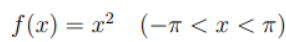

## 1. Представить в виде ряда Фурье периодическую функцию
##### 1.1 Вычислить коэффициенты ряда Фурье для периодической функции f(x)
##### 1.2 Аппроксимировать функцию, представленную в виде ряда Фурье
##### 1.3 Изобразить на графике исходную и аппроксимированную функции. Для наглядности изобразить несколько периодов.
##### 1.4 Изобразить несколько вариантов аппроксимации при различных N (количество гармоник)

Fourier coeffs (N = 7):
 [-0.22222222+1.56226400e-16j  0.5       -1.62004288e-16j
 -2.        +2.28258076e-16j  3.28986813+0.00000000e+00j
 -2.        -2.28258076e-16j  0.5       +1.62004288e-16j
 -0.22222222-1.56226400e-16j] 



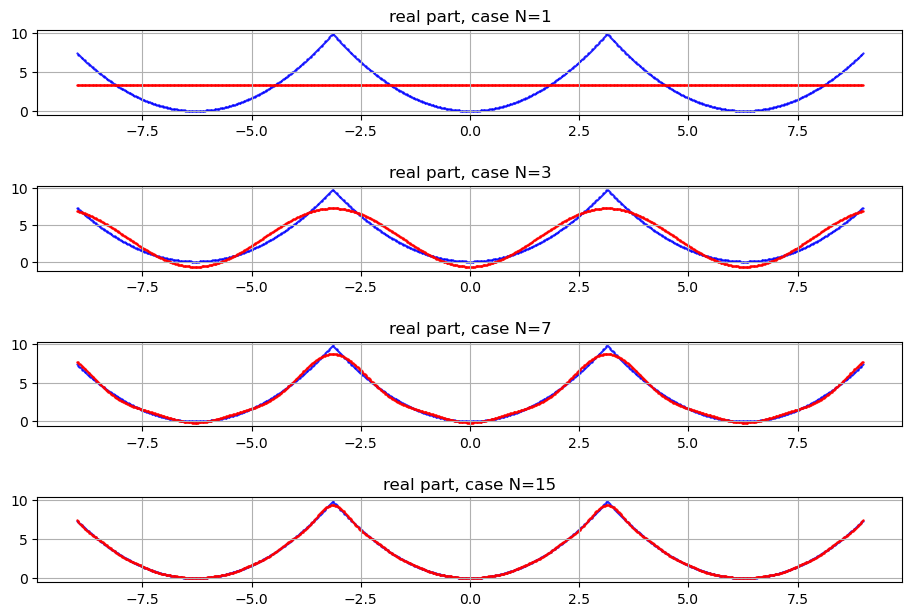

In [203]:
import scipy.signal
import matplotlib.pyplot as plt
import copy as cp
import math

import numpy as np
import scipy.integrate as spi

# Пример. Расчет коэффициентов ряда Фурье и аппроксимация исходной функции f(x)
# Возьмем в качестве примера комплексную функцию, для которой:
# - действительная часть - периодическая парабола;
# - мнимая часть - прямая с коэффициентом наклона 1.

f = lambda x: (((x + np.pi) % T) - T/2.) ** 2
T = 2 * np.pi

# Исходные данные
x1 = -9.    # Нижняя граница области определения функции
x2 = 9.     # Верхняя граница области определения функции
Nx = 1000   # Дискретизация по оси X

# Ось X
x_range = np.linspace(x1, x2, Nx)

# Эталонные кривые исходной функции f(x)
y_true = f(x_range)

y_true_real = [y.real for y in y_true]
y_true_imag = [y.imag for y in y_true]

# Расчет интеграла от комплексной функции
def integral_complex(func, a, b, **kwargs):

  def real_func(x):
    return np.real(func(x))
  def imag_func(x):
    return np.imag(func(x))

  real_integral = spi.quad(real_func, a, b, **kwargs)
  imag_integral = spi.quad(imag_func, a, b, **kwargs)
  integral = (real_integral[0] + 1j*imag_integral[0], real_integral[1:], imag_integral[1:], a, b)
  # print(integral)
  # print(imag_integral[1:])
  return integral

# Вычисление коэффициентов ряда Фурье c[-N/2],.., c[0], .., c[N/2-1] (всего N)
def fourier_coeffs(func, N):
  result = []
  N1 = -int(N/2)
  N2 = int((N-1)/2)
  for k in range(N1, N2+1):
    ck = (1./T) * integral_complex(lambda x: func(x) * np.exp(-1j * 2 * np.pi * k * x / T), -T/2, T/2)[0]
    result.append(ck)
  return np.array(result)

# Аппроксимация (восстановление) функции f(x) при помощи коэффициентов c[k]
def fourier_fit(x, c):
  result = 0. + 0.j
  N = len(c)
  N1 = -int(N/2)
  N2 = int((N-1)/2)
  for k in range(N1, N2+1):
    result += c[k+int(N/2)] * np.exp(1j * 2. * np.pi * k * x / T)
  return result

C = fourier_coeffs(f, 7)
print('Fourier coeffs (N = 7):\n', C, '\n')

# Вычисление коэффициентов, аппроксимация, построение графиков при разных N
N_all = [1, 3, 7, 15]

fig, axs = plt.subplots(len(N_all), 1, figsize=(10, 7))
# fig, axs = plt.subplots(len(N_all), 2, figsize=(10, 7))   # all what commented below is for Imm
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
row = 0
for N in N_all:
  C = fourier_coeffs(f, N)
  y_approx = fourier_fit(x_range, C)
  y_approx_real = [y.real for y in y_approx]
  # y_approx_imag = [y.imag for y in y_approx]
  axs[row].set_title('real part, case N=' + str(N))         # to use with Imm change [row] to [row, 0]
  # axs[row, 1].set_title('imag part, case N=' + str(N))
  axs[row].grid(True)
  # axs[row, 1].grid(True)
  axs[row].scatter(x_range, y_true_real, color='blue', s=1, marker='.')
  axs[row].scatter(x_range, y_approx_real, color='red', s=2, marker='.')
  # axs[row, 1].scatter(x_range, y_true_imag, color='blue', s=1, marker='.')
  # axs[row, 1].scatter(x_range, y_approx_imag, color='red', s=2, marker='.')
  row += 1
plt.show()

##### 1.5 Найти коэффициенты ряда Фурье методом ДПФ. Изобразить на графике исходную и аппроксимированную функции.

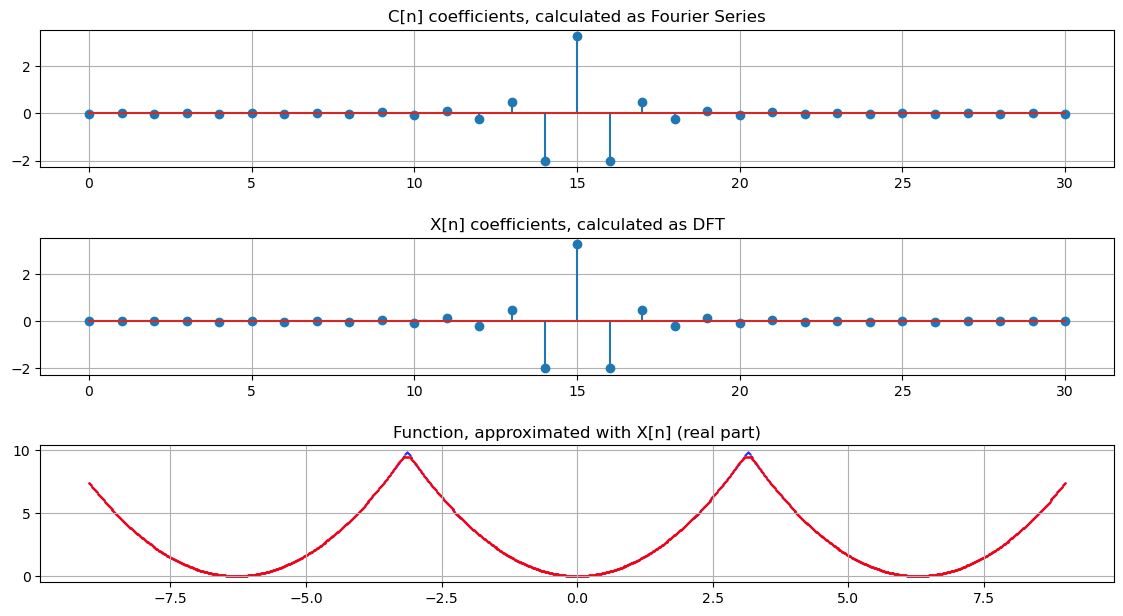

In [204]:
from scipy import fftpack

# Количество коэффициентов
N_dft = 31

# Расчет коэффициентов ряда Фурье
cn = fourier_coeffs(f, N_dft)

# Определение функции f(x) на одном периоде (от 0 до T)
x_period = np.arange(0, T, T/N_dft)
fx = f(x_period)

# Расчет коэффициентов методом ДПФ
X = fftpack.fft(fx) / N_dft
X = np.roll(X, int(N_dft/2))

# Аппроксимация функции f(x) новым набором коэффициентов
y_approx = fourier_fit(x_range, X)
y_approx_real = [y.real for y in y_approx]
y_approx_imag = [y.imag for y in y_approx]

# Отображение результатов
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 7))
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
axes[0].stem(np.real(cn))
axes[0].grid(True)
axes[0].set_title('C[n] coefficients, calculated as Fourier Series')
axes[1].stem(np.real(X))
axes[1].grid(True)
axes[1].set_title('X[n] coefficients, calculated as DFT')
axes[2].scatter(x_range, y_true_real, color='blue', s=1, marker='.')
axes[2].scatter(x_range, y_approx_real, color='red', s=2, marker='.')
axes[2].set_title('Function, approximated with X[n] (real part)')
# axes[1,1].scatter(x_range, y_true_imag, color='blue', s=1, marker='.')
# axes[1,1].scatter(x_range, y_approx_imag, color='red', s=2, marker='.')
# axes[1,1].set_title('Function, approximated with X[n] (imag part)')
axes[2].grid(True)
# axes[1,1].grid(True)
plt.show()

## 2. Амплитудный и фазовый спектры действиетльного гармонического сигнала
##### 2.1
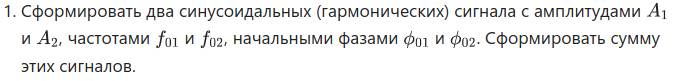 <br>
##### 2.2
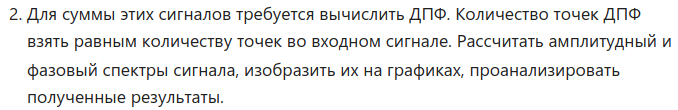 <br>

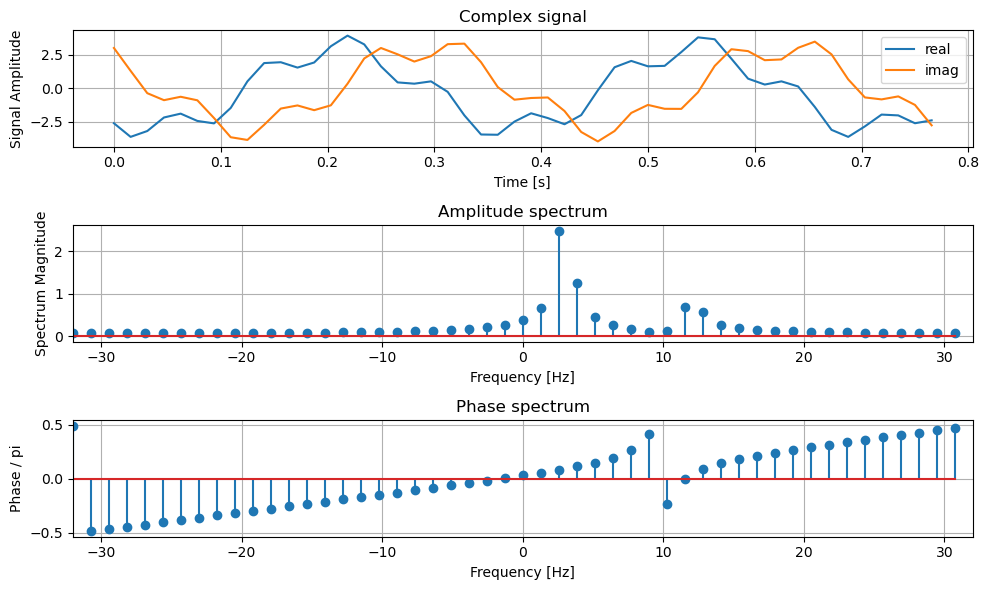

In [205]:
from matplotlib import pyplot as plt
from scipy import fftpack
import numpy as np

Amp1 = 3                # Ампилитуда сигнала 1
Amp2 = 1                # Ампилитуда сигнала 2

f01 = 3                 # Частота сигнала 1
f02 = 12                # Частота сигнала 2

phi01 = 3 * np.pi / 4       # Фаза сигнала 1
phi02 = 2 * np.pi / 3   # Фаза сигнала 2

Anoise = 5              # Амплитуда шума

K = 1                   # Коэффициент усиления

fs = 64                 # Частота дискретизации в Гц
T = 1 / fs              # Период дискретизации в секундах
N = 50                  # Размер ДПФ (количество гармоник)

# Оси времени и частоты
t = np.linspace(0, N * T, N, endpoint = False)
f = fftpack.fftfreq(N) * fs

# Генерация сигнала 1 и 2
x1_imm = Amp1 * np.exp(1j * (2 * np.pi * f01 * t + phi01))
x2_imm = Amp2 * np.exp(1j * (2 * np.pi * f02 * t + phi02))

# Сумма двух сигналов
x_imm = x1_imm + x2_imm

# Дискретное преобразование Фурье
X_imm = fftpack.fft(x_imm) / N

# Амплитудный и фазовый частотный спектры
A_imm = np.abs(X_imm);
P_imm = np.arctan(np.imag(X_imm) / (np.real(X_imm)+1e-6));

# Отображение группами (subplot)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 6))

x = X_imm
A = A_imm
P = P_imm

Title = 'Complex signal'
axes[0].plot(t, np.real(x_imm), label='real')
axes[0].plot(t, np.imag(x_imm), label='imag')
# ?? maybe this version ??
# axes[0].plot(t, np.real(x), label='real')
# axes[0].plot(t, np.imag(x), label='imag')
axes[0].grid(True)
axes[0].set_xlabel('Time [s]')
axes[0].set_ylabel('Signal Amplitude')
axes[0].legend()
axes[0].title.set_text(Title)
axes[1].stem(f, A)
axes[1].grid(True)
axes[1].set_xlabel('Frequency [Hz]')
axes[1].set_ylabel('Spectrum Magnitude')
axes[1].set_xlim(-fs/2, fs/2)
axes[1].title.set_text('Amplitude spectrum')
axes[2].stem(f, P / np.pi)
axes[2].grid(True)
axes[2].set_xlabel('Frequency [Hz]')
axes[2].set_ylabel('Phase / pi')
axes[2].set_xlim(-fs/2, fs/2)
axes[2].title.set_text('Phase spectrum')

fig.tight_layout()
plt.show()


##### 2.3
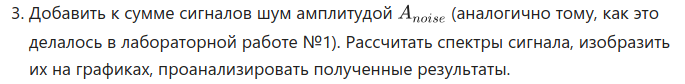

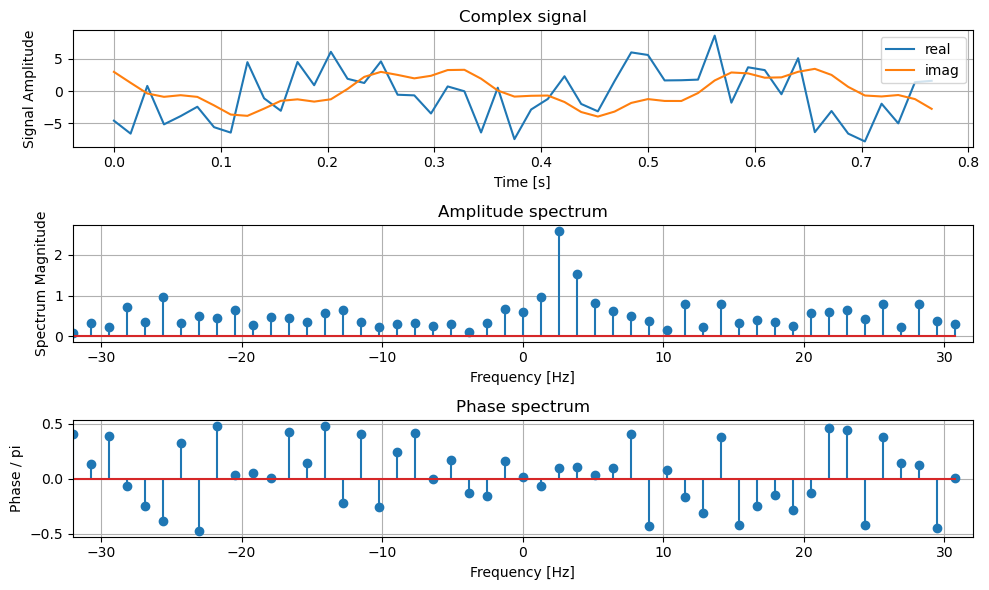

In [206]:
import random

random.seed(225)

# Генерация шума амплитуды Anoise
noise = np.linspace(0, N * T, N, endpoint = False)
for i in range(0, len(noise)):
  noise[i]= random.randint(-Anoise, Anoise)

# Добавление шума к сумме сигналов 1 и 2
noise_imm = x_imm + noise

# Дискретное преобразование Фурье
NOISE_imm = fftpack.fft(noise_imm) / N

# Амплитудный и фазовый частотный спектры
A_imm = np.abs(NOISE_imm);
P_imm = np.arctan(np.imag(NOISE_imm) / (np.real(NOISE_imm)+1e-6));

# Отображение группами (subplot)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 6))

x = NOISE_imm
A = A_imm
P = P_imm

Title = 'Complex signal'
axes[0].plot(t, np.real(noise_imm), label='real')
axes[0].plot(t, np.imag(noise_imm), label='imag')
# ?? maybe this version ??
# axes[0].plot(t, np.real(x), label='real')
# axes[0].plot(t, np.imag(x), label='imag')
axes[0].grid(True)
axes[0].set_xlabel('Time [s]')
axes[0].set_ylabel('Signal Amplitude')
axes[0].legend()
axes[0].title.set_text(Title)
axes[1].stem(f, A)
axes[1].grid(True)
axes[1].set_xlabel('Frequency [Hz]')
axes[1].set_ylabel('Spectrum Magnitude')
axes[1].set_xlim(-fs/2, fs/2)
axes[1].title.set_text('Amplitude spectrum')
axes[2].stem(f, P / np.pi)
axes[2].grid(True)
axes[2].set_xlabel('Frequency [Hz]')
axes[2].set_ylabel('Phase / pi')
axes[2].set_xlim(-fs/2, fs/2)
axes[2].title.set_text('Phase spectrum')

fig.tight_layout()
plt.show()

##### 2.4
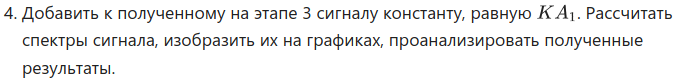

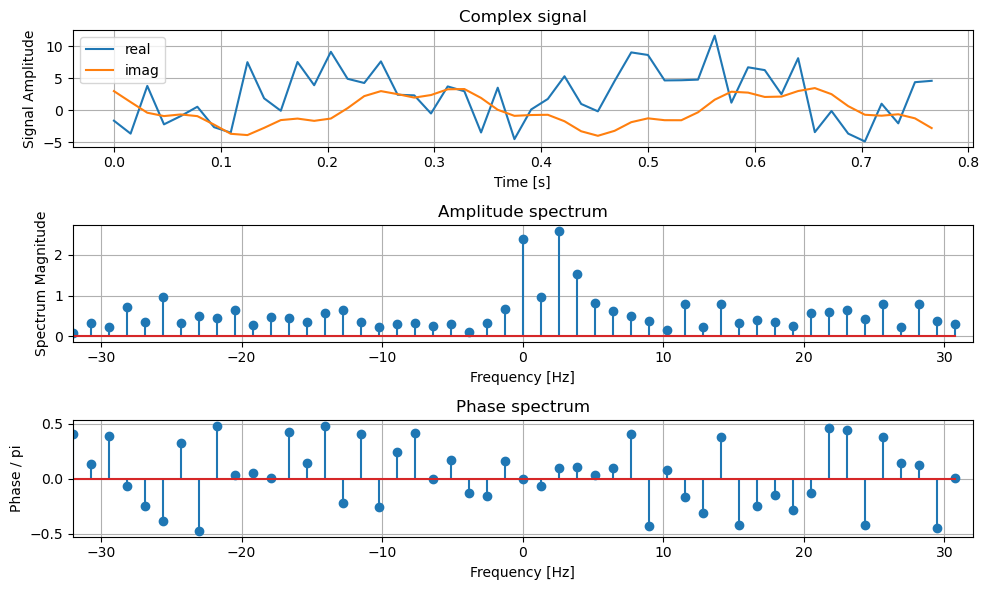

In [207]:
# Добавляем к зашумленному сигналу значение K * Amp1
noise_imm_2 = noise_imm + K * Amp1

# Дискретное преобразование Фурье
NOISE_imm_2 = fftpack.fft(noise_imm_2) / N

# Амплитудный и фазовый частотный спектры
A_imm = np.abs(NOISE_imm_2);
P_imm = np.arctan(np.imag(NOISE_imm_2) / (np.real(NOISE_imm_2)+1e-6));


# Отображение группами (subplot)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 6))

x = NOISE_imm_2
A = A_imm
P = P_imm

Title = 'Complex signal'
axes[0].plot(t, np.real(noise_imm_2), label='real')
axes[0].plot(t, np.imag(noise_imm_2), label='imag')
# ?? maybe this version ??
# axes[0].plot(t, np.real(x), label='real')
# axes[0].plot(t, np.imag(x), label='imag')
axes[0].grid(True)
axes[0].set_xlabel('Time [s]')
axes[0].set_ylabel('Signal Amplitude')
axes[0].legend()
axes[0].title.set_text(Title)
axes[1].stem(f, A)
axes[1].grid(True)
axes[1].set_xlabel('Frequency [Hz]')
axes[1].set_ylabel('Spectrum Magnitude')
axes[1].set_xlim(-fs/2, fs/2)
axes[1].title.set_text('Amplitude spectrum')
axes[2].stem(f, P / np.pi)
axes[2].grid(True)
axes[2].set_xlabel('Frequency [Hz]')
axes[2].set_ylabel('Phase / pi')
axes[2].set_xlim(-fs/2, fs/2)
axes[2].title.set_text('Phase spectrum')

fig.tight_layout()
plt.show()

##### 2.5
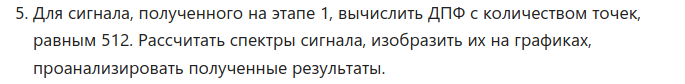

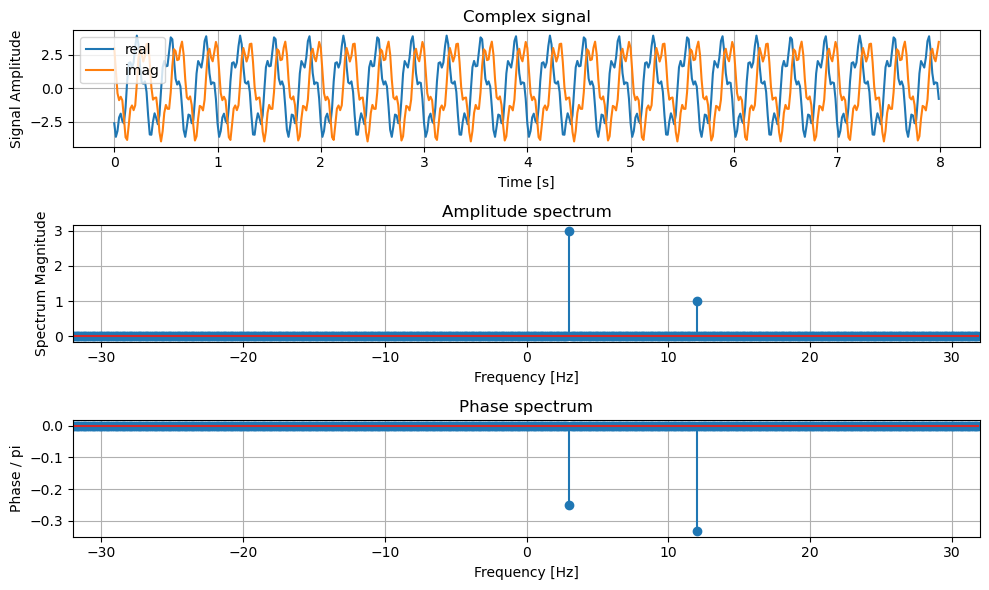

In [208]:

N = 512

# Оси времени и частоты
t = np.linspace(0, N * T, N, endpoint = False)
f = fftpack.fftfreq(N) * fs

# Генерация действительного и комплексного гармонического сигнала
x1_imm = Amp1 * np.exp(1j * (2 * np.pi * f01 * t + phi01))
x2_imm = Amp2 * np.exp(1j * (2 * np.pi * f02 * t + phi02))

x_imm = x1_imm + x2_imm

# Дискретное преобразование Фурье
X_imm = fftpack.fft(x_imm) / N


# Амплитудный и фазовый частотный спектры
A_imm = np.abs(X_imm);
P_imm = np.arctan(np.imag(X_imm) / (np.real(X_imm)+1e-6));

# Отображение группами (subplot)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 6))

x = X_imm
A = A_imm
P = P_imm

Title = 'Complex signal'
axes[0].plot(t, np.real(x_imm), label='real')
axes[0].plot(t, np.imag(x_imm), label='imag')
# ?? maybe this version ??
# axes[0].plot(t, np.real(x), label='real')
# axes[0].plot(t, np.imag(x), label='imag')
axes[0].grid(True)
axes[0].set_xlabel('Time [s]')
axes[0].set_ylabel('Signal Amplitude')
axes[0].legend()
axes[0].title.set_text(Title)
axes[1].stem(f, A)
axes[1].grid(True)
axes[1].set_xlabel('Frequency [Hz]')
axes[1].set_ylabel('Spectrum Magnitude')
axes[1].set_xlim(-fs/2, fs/2)
axes[1].title.set_text('Amplitude spectrum')
axes[2].stem(f, P / np.pi)
axes[2].grid(True)
axes[2].set_xlabel('Frequency [Hz]')
axes[2].set_ylabel('Phase / pi')
axes[2].set_xlim(-fs/2, fs/2)
axes[2].title.set_text('Phase spectrum')

fig.tight_layout()
plt.show()

## 3. Исследование ДПФ комплексной "вырезки" гармонического сигнала

##### 3.1
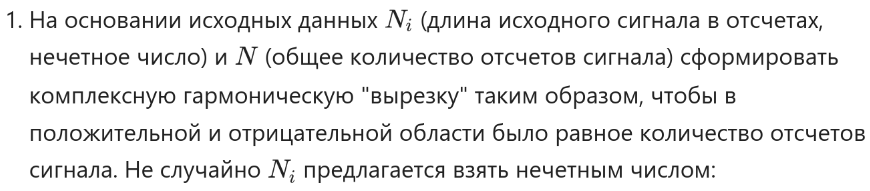

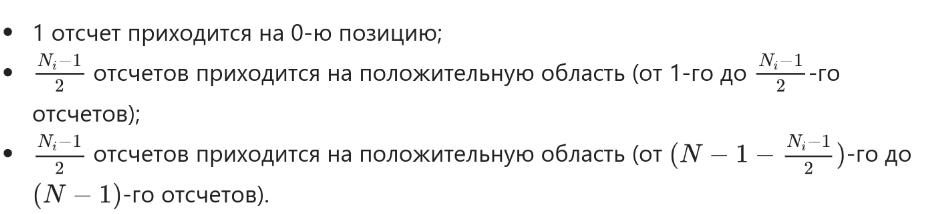

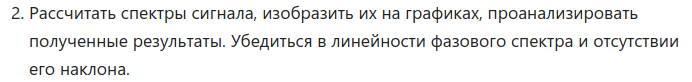

In [218]:
phi0 = 2 * np.pi / 6
f0 = 4
N = 128
T = 1 / (3 * f0 * 3)
Ni = 13
sign = -1
s = sign * 3

n = 6


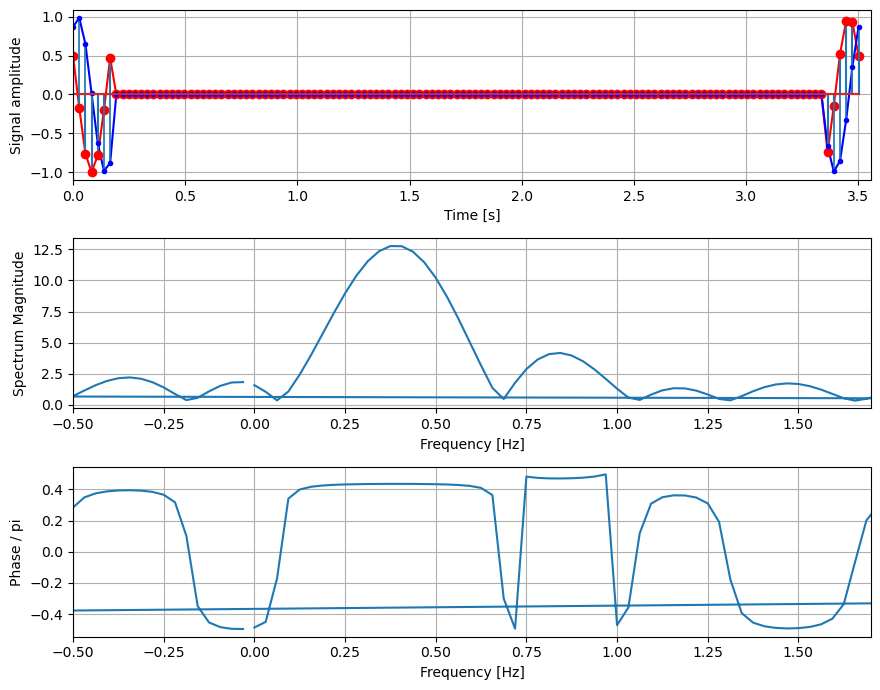

In [219]:
from matplotlib import pyplot as plt
from scipy import fftpack
import numpy as np

t = np.linspace(0, (N-1)*T, N, endpoint = False)

sig = np.exp(1j * (2 * np.pi * f0 * t + phi0))

n = int((Ni - 1) / 2)
print(f'n = {n}')
x = np.concatenate((sig[0:n + 1], np.zeros(N - Ni), sig[N - n:N]))

f = fftpack.fftfreq(len(x)) * f0
X = fftpack.fft(x)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 7))

A_imm = np.abs(X)
P_imm = np.arctan(np.imag(X) / (np.real(X) + 1e-6));

axes[0].plot(t, np.real(x), label='real', color='red')
axes[0].plot(t, np.imag(x), label='imag', color='blue')
markerline, stemline, baseline, = axes[0].stem(t, np.real(x), label='real', markerfmt='ro')
markerline, stemline, baseline, = axes[0].stem(t, np.imag(x), label='imag', markerfmt='bo')
plt.setp(stemline, linewidth = 1.25)
plt.setp(markerline, markersize = 3)
axes[0].grid(True)
axes[0].set_xlabel('Time [s]')
axes[0].set_ylabel('Signal amplitude')
axes[0].set_xlim(0, np.max(N)*T)
axes[1].grid(True)
axes[1].plot(f, A_imm)
axes[1].set_xlabel('Frequency [Hz]')
axes[1].set_ylabel('Spectrum Magnitude')
axes[1].set_xlim(-0.5, f0 / 2 - 0.3)
axes[2].grid(True)
axes[2].plot(f, P_imm / np.pi)
axes[2].set_xlabel('Frequency [Hz]')
axes[2].set_ylabel('Phase / pi')
axes[2].set_xlim(-0.5, f0 / 2 - 0.3)
fig.tight_layout()
plt.show()

In [220]:
print(f'Ni == A: {Ni} == {np.round(np.max(A_imm))}, {Ni == np.round(np.max(A_imm))}')
print(f'Pos of max A: {f0 * T * N}')
print(f'Pos of A nulls: {1/ (T * Ni)}')
mu = 0.25
print(f'Phase parameter: {-s * mu * 2 * np.pi / N + phi0}')

Ni == A: 13 == 13.0, True
Pos of max A: 14.222222222222221
Pos of A nulls: 2.769230769230769
Phase parameter: 1.0840130901058531


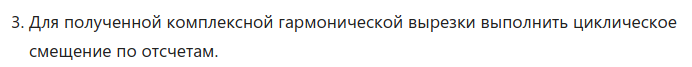

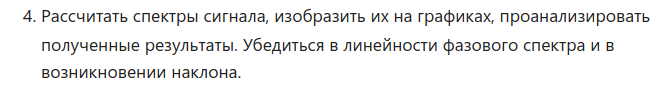

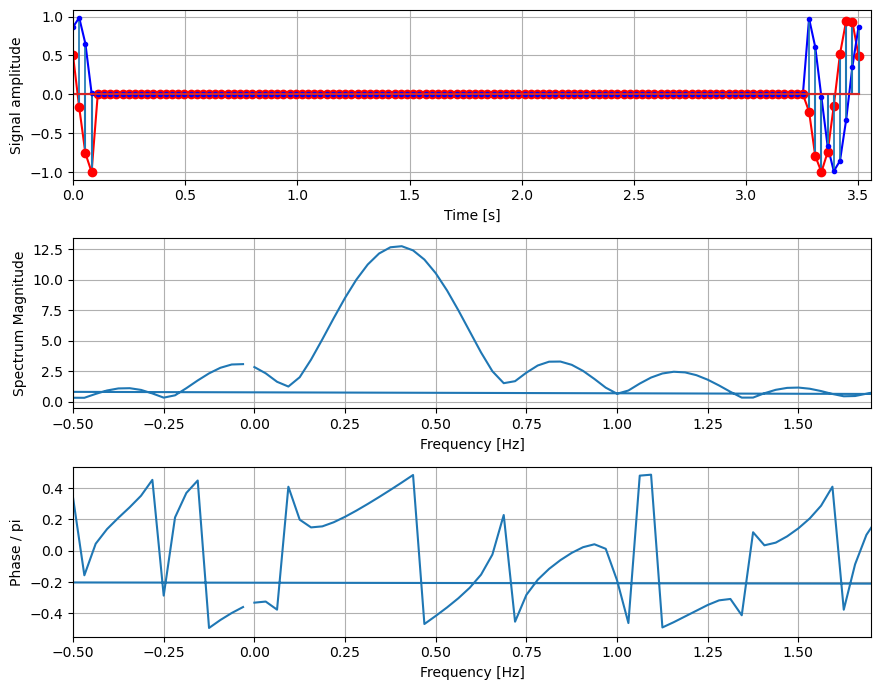

In [221]:
from matplotlib import pyplot as plt
from scipy import fftpack
import numpy as np


t = np.linspace(0, (N-1)*T, N, endpoint = False)

sig = np.exp(1j * (2 * np.pi * f0 * t + phi0))

x = np.concatenate((sig[0:(n + s + 1)], np.zeros(N - Ni), sig[(N - n + s):N]))

f = fftpack.fftfreq(len(x)) * f0
X = fftpack.fft(x)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 7))

A_imm = np.abs(X)
P_imm = np.arctan(np.imag(X) / (np.real(X)+1e-6));

axes[0].plot(t, np.real(x), label='real', color='red')
axes[0].plot(t, np.imag(x), label='imag', color='blue')
markerline, stemline, baseline, = axes[0].stem(t, np.real(x), label='real', markerfmt='ro')
markerline, stemline, baseline, = axes[0].stem(t, np.imag(x), label='imag', markerfmt='bo')
plt.setp(stemline, linewidth = 1.25)
plt.setp(markerline, markersize = 3)
axes[0].grid(True)
axes[0].set_xlabel('Time [s]')
axes[0].set_ylabel('Signal amplitude')
axes[0].set_xlim(0, np.max(N)*T)
axes[1].grid(True)
axes[1].plot(f, A_imm)
axes[1].set_xlabel('Frequency [Hz]')
axes[1].set_ylabel('Spectrum Magnitude')
axes[1].set_xlim(-0.5, f0 / 2 - 0.3)
axes[2].grid(True)
axes[2].plot(f, P_imm / np.pi)
axes[2].set_xlabel('Frequency [Hz]')
axes[2].set_ylabel('Phase / pi')
axes[2].set_xlim(-0.5, f0 / 2 - 0.3)
fig.tight_layout()
plt.show()

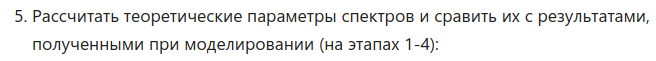

In [213]:
print(f'Ni == A: {Ni} == {np.round(np.max(A_imm))}, {Ni == np.round(np.max(A_imm))}')
print(f'Pos of max A: {f0 * T * N}')
print(f'Pos of A nulls: {1/ (T * Ni)}')
mu = 0.25
print(f'Phase parameter: {-s * mu * 2 * np.pi / N + phi0}')

Ni == A: 13 == 13.0, True
Pos of max A: 14.222222222222221
Pos of A nulls: 2.769230769230769
Phase parameter: 1.0840130901058531


## 3. Extra
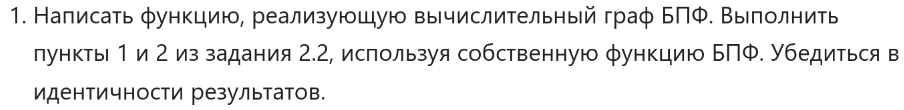

In [ ]:
import math

def fft_butterfly(x):
  # i - iterator
  # j - wing number
  # k - jump to next halfwing (step)
  # h - jump  to next wing (step)
  def halfwing_op(up, dn, W=1, thinning=1):
    sum_ = up + dn
    if(thinning): # thinning right
      sub_ = W * (up - dn)
    else:         # thinning left
      sub_ = (up - W * dn)
    return sum_, sub_

  def vector_rotation_operator(angle, inverse=0):
    if(inverse):
      return complex(cos(angle), sin(angle)) # fft
    else:
      return complex(cos(angle), sin(-angle)) # ifft 

  x_cp = x.copy()
  i_lim = int(log(len(x), 2))
  # print("i , j , h , k")
  for i in range(i_lim):
    # print("=============")
    for j in range((2**i )):
      # print("-------------")
      k_lim = int(len(x) / (2**(i+1)))
      h_lim = 2 * k_lim
      for k in range(k_lim):
        # print(i,",", j,",", k,",", k_lim)

        x_cp[j * h_lim + k], x_cp[j * h_lim + k + k_lim] = halfwing_op(x_cp[j * h_lim + k], x_cp[j * h_lim + k + k_lim])
  # print("-------------")
  return x_cp